# Initial Analysis of the CMU Pronouncing Dictionary (CMUdict)

In this notebook, we begin our project by performing an initial analysis of the CMUdict dataset. We will:
- Load the CMUdict dictionary
- Analyze the distribution of phones
- Summarize key statistics (number of words, unique phones, phone frequencies)

This will help us understand the complexity of the problem and inform the design of our baseline model.

Number of words: 135166
Number of unique phones: 69
Most common phones: [('AH0', 63181), ('N', 61255), ('S', 50458), ('L', 49999), ('T', 49099), ('R', 46496), ('K', 43103), ('D', 32575), ('IH0', 30216), ('M', 29751)]


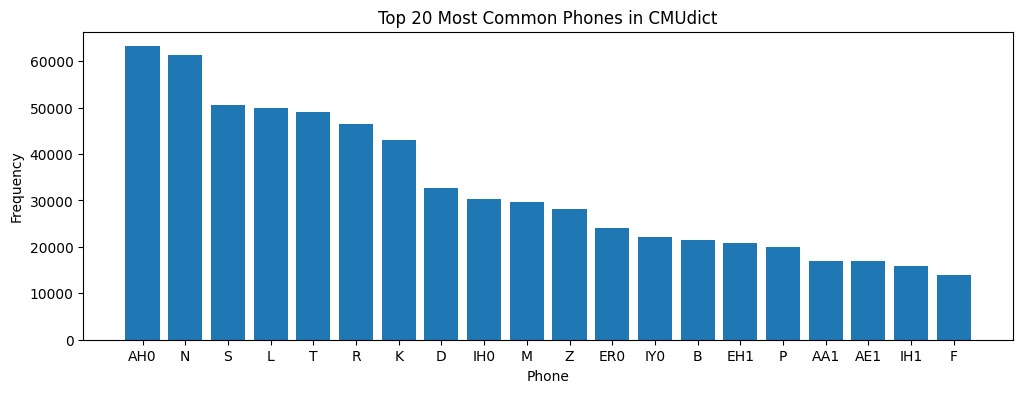

In [33]:
# Load and analyze the CMUdict dictionary
import collections
import matplotlib.pyplot as plt

# Load the dictionary file
cmudict_path = 'cmudict.dict.txt'
words = []
phones = []
phone_freq = collections.Counter()

with open(cmudict_path, 'r') as f:
    for line in f:
        if line.strip() and not line.startswith(';;;'):
            parts = line.strip().split()
            word = parts[0]
            word_phones = parts[1:]
            words.append(word)
            phones.extend(word_phones)
            phone_freq.update(word_phones)

num_words = len(words)
unique_phones = set(phones)
num_unique_phones = len(unique_phones)

print(f"Number of words: {num_words}")
print(f"Number of unique phones: {num_unique_phones}")
print(f"Most common phones: {phone_freq.most_common(10)}")

# Plot phone frequency distribution
plt.figure(figsize=(12,4))
plt.bar(*zip(*phone_freq.most_common(20)))
plt.title('Top 20 Most Common Phones in CMUdict')
plt.ylabel('Frequency')
plt.xlabel('Phone')
plt.show()


Total number of phonemes: 863018


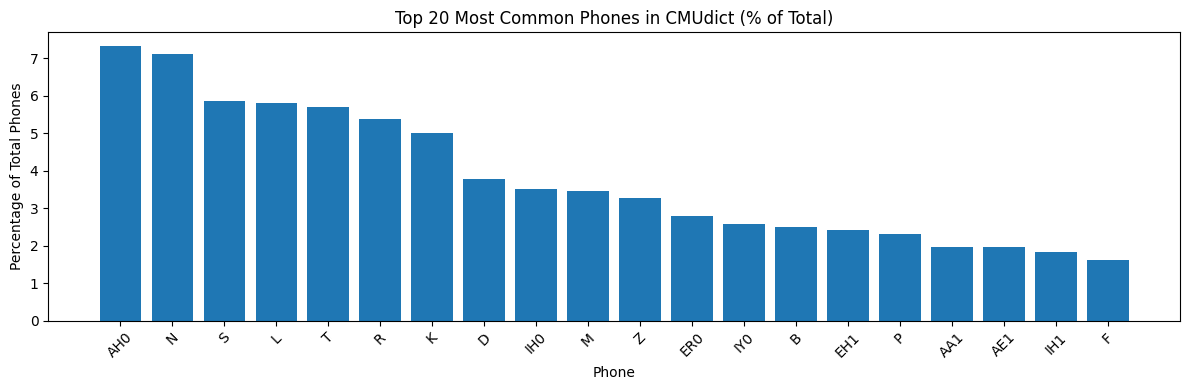


Top 10 phones by percentage:
AH0: 7.32%
N: 7.10%
S: 5.85%
L: 5.79%
T: 5.69%
R: 5.39%
K: 4.99%
D: 3.77%
IH0: 3.50%
M: 3.45%


In [34]:
# Calculate total phonemes and percentages
total_phonemes = sum(phone_freq.values())
print(f"\nTotal number of phonemes: {total_phonemes}")

# Calculate and plot phone frequencies as percentages
percentages = {phone: (count/total_phonemes)*100 for phone, count in phone_freq.items()}
sorted_percentages = dict(sorted(percentages.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(12,4))
plt.bar(list(sorted_percentages.keys())[:20], list(sorted_percentages.values())[:20])
plt.title('Top 20 Most Common Phones in CMUdict (% of Total)')
plt.ylabel('Percentage of Total Phones')
plt.xlabel('Phone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print top 10 phones with percentages
print("\nTop 10 phones by percentage:")
for phone, pct in list(sorted_percentages.items())[:10]:
    print(f"{phone}: {pct:.2f}%")

## Observations from Initial Analysis

- The CMUdict contains a large number of words and a diverse set of phones.
- Some phones are much more common than others, indicating an imbalanced distribution.
- This imbalance may affect model performance and bias.

Next, we will develop a simple baseline classifier using phone statistics.

## Baseline Classifier: Predicting Word Length from Phone Count

As a simple baseline, we will build a regressor that predicts the number of letters in a word (word length) from the number of phones in its pronunciation. This will help us understand the relationship between orthography and phonology in the dataset.

Baseline regressor coefficients: [1.04690868]
Intercept: 0.9422726058420361
MSE: 1.65
R^2: 0.78


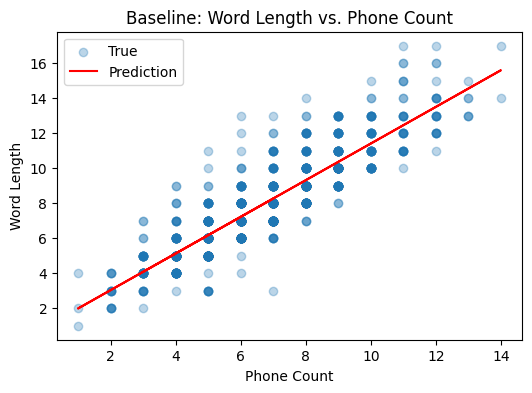

In [35]:
# Baseline regressor: predict word length from phone count
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data: word length vs. phone count
X = []  # phone counts
y = []  # word lengths
for word, line in zip(words, open(cmudict_path)):
    if line.strip() and not line.startswith(';;;'):
        parts = line.strip().split()
        word_phones = parts[1:]
        X.append([len(word_phones)])
        y.append(len(word))

X = np.array(X)
y = np.array(y)

# Use a subset for demonstration
X_sub = X[:1000]
y_sub = y[:1000]

# Fit linear regression
reg = LinearRegression().fit(X_sub, y_sub)
y_pred = reg.predict(X_sub)

print(f"Baseline regressor coefficients: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")
print(f"MSE: {mean_squared_error(y_sub, y_pred):.2f}")
print(f"R^2: {r2_score(y_sub, y_pred):.2f}")

# Plot predictions vs. true values
plt.figure(figsize=(6,4))
plt.scatter(X_sub, y_sub, alpha=0.3, label='True')
plt.plot(X_sub, y_pred, color='red', label='Prediction')
plt.xlabel('Phone Count')
plt.ylabel('Word Length')
plt.title('Baseline: Word Length vs. Phone Count')
plt.legend()
plt.show()

## Baseline Results and Discussion

- The baseline regressor provides a simple mapping from phone count to word length.
- The $R^2$ and MSE values give us a sense of how much variance in word length can be explained by phone count alone.
- This baseline helps us understand the inherent bias and limitations of using only phone statistics for prediction.

**Next steps:**
- Explore more complex features (e.g., phone types, stress patterns)
- Develop more advanced models
- Investigate sources of bias in the dataset and model predictions

---

### Proof of Project Initiation

- The code and analysis above demonstrate that we have begun the project in a significant manner.
- We have performed initial data exploration, implemented a baseline model, and documented our findings.
- All code is available in this notebook for reproducibility and further development.

In [36]:
# Find words with 3 letters and 5 phones
three_letter_five_phones = []
for word, line in zip(words, open(cmudict_path)):
    if len(word) == 3:  # 3 letters
        parts = line.strip().split()
        word_phones = parts[1:]
        if len(word_phones) == 5:  # 5 phones
            three_letter_five_phones.append((word, word_phones))

print("\nExamples of 3-letter words with 5 phones:")
for word, phones in three_letter_five_phones[:20]:  # Show first 3 examples
    print(f"Word: {word}, Phones: {' '.join(phones)}")


Examples of 3-letter words with 5 phones:
Word: abc, Phones: EY1 B IY2 S IY2
Word: abd, Phones: EY2 B IY2 D IY1
Word: abs, Phones: EY1 B IY1 EH1 S
Word: acc, Phones: AY2 S IY2 S IY1
Word: ach, Phones: EY1 S IY1 EY1 CH
Word: acm, Phones: EY2 S IY2 EH1 M
Word: afl, Phones: EY2 EH2 F EH1 L
Word: amc, Phones: EY1 EH2 M S IY1
Word: amd, Phones: EY1 EH2 M D IY1
Word: apc, Phones: EY1 P IY1 S IY1
Word: atm, Phones: EY1 T IY2 EH1 M
Word: atp, Phones: EY1 T IY1 P IY1
Word: atv, Phones: EY2 T IY2 V IY1
Word: aug, Phones: AO1 G AH0 S T
Word: bta, Phones: B IY1 T IY1 EY1
Word: cds, Phones: S IY2 D IY1 Z
Word: cfo, Phones: S IY1 EH2 F OW1
Word: cgi, Phones: S IY2 G IY2 AY1
Word: cit, Phones: S IY2 AY2 T IY1
Word: clo, Phones: S IY2 EH2 L OW1


In [ ]:
def padding_word(seq, max_length):
    padded_seq = seq + '%' + '-' * (max_length - len(seq)-1)
    return padded_seq[:max_length]

print(padding_word('cat', 4))

def phone_padding(seq, max_length):
    padded_seq = list(seq)
    for i in range(len(seq), max_length):
        padded_seq.append( '-')
    return padded_seq[:max_length]
print(phone_padding(['K', 'AE1', 'T'], 6))

cat%
['K', 'AE1', 'T', '-', '-', '-']


In [74]:
# Import required libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np

# Create character and phoneme vocabularies
def create_vocab(words, phones):
    char_vocab = set(''.join(words))
    phone_vocab = set(phone for phone_list in phones for phone in phone_list)
    
    # Create mapping dictionaries
    char_to_idx = {char: idx for idx, char in enumerate(sorted(char_vocab))}
    idx_to_char = {idx: char for char, idx in char_to_idx.items()}
    phone_to_idx = {phone: idx for idx, phone in enumerate(sorted(phone_vocab))}
    idx_to_phone = {idx: phone for phone, idx in phone_to_idx.items()}
    
    return char_to_idx, idx_to_char, phone_to_idx, idx_to_phone



# Prepare dataset
word_phone_pairs = []
for word, line in zip(words, open(cmudict_path)):
    if line.strip() and not line.startswith(';;;'):
        parts = line.strip().split()
        word_phones = parts[1:]

        # Add padding Atul 
        max_length = len(word) + 1
        #+ len(word_phones)
        word_phone_pairs.append((padding_word(word, max_length), phone_padding(word_phones, max_length)))
        #word_phone_pairs.append((word, phone_padding(word_phones, max_length)))
        # word_phone_pairs.append((word, word_phones))

# Create vocabularies
char_to_idx, idx_to_char, phone_to_idx, idx_to_phone = create_vocab(
    [pair[0] for pair in word_phone_pairs],
    [pair[1] for pair in word_phone_pairs]
)

print(f"Vocabulary sizes: {len(char_to_idx)} characters, {len(phone_to_idx)} phones")

Vocabulary sizes: 35 characters, 70 phones


In [75]:
# Custom Dataset class for sliding window approach
class PhonemeDataset(Dataset):
    def __init__(self, word_phone_pairs, char_to_idx, phone_to_idx, window_size=7):
        self.window_size = window_size
        self.data = []
        
        # Create sliding windows for each word
        for word, phones in word_phone_pairs:
            # Pad word with spaces
            padded_word = ' ' * (window_size//2) + word + ' ' * (window_size//2)

            
            
            # Create windows and their corresponding phonemes
            for i in range(len(word)):
          
                
                window = padded_word[i:i+window_size]
                # Convert characters to indices
                char_indices = [char_to_idx.get(c, 0) for c in window]
                # Convert phoneme to index
                if i < len(phones):
                    phone_idx = phone_to_idx.get(phones[i], 0)
                    self.data.append((char_indices, phone_idx))
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        chars, phone = self.data[idx]
        return torch.tensor(chars), torch.tensor(phone)

# Split data into train and test sets
train_pairs, test_pairs = train_test_split(word_phone_pairs, test_size=0.2, random_state=42)

# Create datasets
train_dataset = PhonemeDataset(train_pairs, char_to_idx, phone_to_idx)
test_dataset = PhonemeDataset(test_pairs, char_to_idx, phone_to_idx)

print(f"Training samples: {len(train_dataset)}, Test samples: {len(test_dataset)}")

Training samples: 943893, Test samples: 236189


In [76]:
# Define the neural network model

# fully connected network with embedding layer
# class PhonemeClassifier(nn.Module):
#     def __init__(self, vocab_size, hidden_size, num_phones):
#         super().__init__()
#         self.embedding = nn.Embedding(vocab_size, hidden_size)
#         self.fc1 = nn.Linear(hidden_size * 7, hidden_size)  # 7 is window size
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size, num_phones)
    
#     def forward(self, x):
#         x = self.embedding(x)              # (batch_size, window_size, hidden_size)
#         x = x.view(x.size(0), -1)          # flatten window dimension
#         x = self.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x

# convolutional neural network
class ConvPhonemeClassifier(nn.Module):
    def __init__(self, vocab_size, hidden_size, num_phones,
                 kernel_sizes=(3, 5, 7), num_groups=8, dropout=0.10):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, hidden_size)

        # Multi-kernel temporal convs over the 7-char window
        self.convs = nn.ModuleList([
            nn.Conv1d(hidden_size, hidden_size, k, padding=k // 2)
            for k in kernel_sizes
        ])
        self.norms = nn.ModuleList([
            nn.GroupNorm(num_groups, hidden_size) for _ in kernel_sizes
        ])
        self.act = nn.GELU()  # smoother than ReLU for small models
        self.dropout = nn.Dropout(dropout)

        self.proj = nn.Linear(hidden_size * len(kernel_sizes), hidden_size)
        self.head = nn.Linear(hidden_size, num_phones)

    def forward(self, x):
        # x: (B, window_size=7)
        x = self.embedding(x)          # (B, 7, H)
        x = x.transpose(1, 2)          # (B, H, 7) for Conv1d (channels-first)

        feats = []
        for conv, norm in zip(self.convs, self.norms):
            y = conv(x)                # (B, H, 7)
            y = norm(y)                # GroupNorm over channels
            y = self.act(y)
            y = torch.amax(y, dim=-1)  # global max pool over time -> (B, H)
            feats.append(y)

        h = torch.cat(feats, dim=1)    # (B, H * #kernels)
        h = self.dropout(self.act(self.proj(h)))  # (B, H)
        out = self.head(h)             # (B, num_phones) logits
        return out

# ---- GPU + batch-size tuning adjustments ----
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

base_batch = 64
batch_size = 512           # try 16, 32, 64, 128
base_lr = 1e-3
lr = base_lr * (batch_size / base_batch)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, num_workers=2)

# Initialize model, loss function, and optimizer
hidden_size = 256
# model = PhonemeClassifier(len(char_to_idx), hidden_size, len(phone_to_idx)).to(device)
model = ConvPhonemeClassifier(len(char_to_idx), hidden_size, len(phone_to_idx)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=lr)

print(f"Model initialized on {device}")
print(f"Batch size: {batch_size}, learning rate: {lr:.5f}")
print("Phoneme vocab:", len(phone_to_idx))

Model initialized
{'#': 0, '-': 1, 'AA0': 2, 'AA1': 3, 'AA2': 4, 'AE0': 5, 'AE1': 6, 'AE2': 7, 'AH0': 8, 'AH1': 9, 'AH2': 10, 'AO0': 11, 'AO1': 12, 'AO2': 13, 'AW0': 14, 'AW1': 15, 'AW2': 16, 'AY0': 17, 'AY1': 18, 'AY2': 19, 'B': 20, 'CH': 21, 'D': 22, 'DH': 23, 'EH0': 24, 'EH1': 25, 'EH2': 26, 'ER0': 27, 'ER1': 28, 'ER2': 29, 'EY0': 30, 'EY1': 31, 'EY2': 32, 'F': 33, 'G': 34, 'HH': 35, 'IH0': 36, 'IH1': 37, 'IH2': 38, 'IY0': 39, 'IY1': 40, 'IY2': 41, 'JH': 42, 'K': 43, 'L': 44, 'M': 45, 'N': 46, 'NG': 47, 'OW0': 48, 'OW1': 49, 'OW2': 50, 'OY0': 51, 'OY1': 52, 'OY2': 53, 'P': 54, 'R': 55, 'S': 56, 'SH': 57, 'T': 58, 'TH': 59, 'UH0': 60, 'UH1': 61, 'UH2': 62, 'UW0': 63, 'UW1': 64, 'UW2': 65, 'V': 66, 'W': 67, 'Y': 68, 'Z': 69, 'ZH': 70, 'dutch': 71, 'foreign': 72, 'irish': 73, 'name': 74, 'name,': 75, 'old': 76, 'org,': 77, 'place,': 78, 'title,': 79}


In [ ]:
# Training loop
num_epochs = 15
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_chars, batch_phones in train_loader:
        # Move batch to device
        batch_chars = batch_chars.to(device)
        batch_phones = batch_phones.to(device)
        
        # Forward pass
        outputs = model(batch_chars)
        loss = criterion(outputs, batch_phones)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    # Evaluate on test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_chars, batch_phones in test_loader:
            batch_chars = batch_chars.to(device)
            batch_phones = batch_phones.to(device)
            outputs = model(batch_chars)
            _, predicted = torch.max(outputs.data, 1)
            total += batch_phones.size(0)
            correct += (predicted == batch_phones).sum().item()
    
    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Average Loss: {total_loss/len(train_loader):.4f}')
    print(f'Test Accuracy: {100 * correct/total:.2f}%\n')

Epoch 1/5:
Average Loss: 0.9722
Test Accuracy: 72.76%

Epoch 2/5:
Average Loss: 0.8346
Test Accuracy: 74.00%



In [71]:
# Test the model on a few examples
def predict_phonemes(word, model, char_to_idx, idx_to_phone, window_size=7):
    model.eval()
    # Pad the word
    padded_word = ' ' * (window_size//2) + word + ' ' * (window_size//2)
    predictions = []
    
    with torch.no_grad():
        for i in range(len(word)):
            window = padded_word[i:i+window_size]
            char_indices = torch.tensor([char_to_idx.get(c, 0) for c in window]).unsqueeze(0)
            char_indices = char_indices.to(device)
            
            output = model(char_indices)
            _, predicted = torch.max(output.data, 1)
            phoneme = idx_to_phone[predicted.item()]
            if phoneme == "%":
                break
            predictions.append(idx_to_phone[predicted.item()])
    
    # return predictions
    return remove_consecutive_duplicates(predictions)

def remove_consecutive_duplicates(phonemes):
    result = []
    for p in phonemes:
        if not result or p != result[-1]:
            result.append(p)
    return result

def remove_padding(phonemes, pad_token='-'):
    return [p for p in phonemes if p != pad_token]
# Test a few words
test_words = ['cat', 'dog', 'bird', 'apple', 'aple', 'bell', 'banana']
print("Example predictions:")
for word in test_words:
    if word in [pair[0] for pair in word_phone_pairs]:
        # predicted = predict_phonemes(word, model, char_to_idx, idx_to_phone)

        predicted = remove_padding(predict_phonemes(word, model, char_to_idx, idx_to_phone))
        print(f"{word}: {' '.join(predicted)}")

Example predictions:


In [73]:
def normalize_phonemes(seq):
    # remove fillers and stray whitespace; keep exact CMU symbols
    return [p.strip() for p in seq if p and p.strip() != '-']

def analyze_prediction(word, model, char_to_idx, idx_to_phone, word_phone_pairs, lookup=None):
    predicted = predict_phonemes(word, model, char_to_idx, idx_to_phone)
    word_norm = word.lower().strip()

    # fast lookup map (recommended): { base_word -> phones }
    if lookup is None:
        lookup = { w.split('%',1)[0].lower().strip(): [p for p in phones]   # keep raw, normalize later
                   for (w, phones) in word_phone_pairs }

    actual = lookup.get(word_norm)

    # normalize for printing & comparison
    pred_norm = normalize_phonemes(predicted)
    act_norm  = normalize_phonemes(actual) if actual else None

    print(f"\nWord: {word}")
    print(f"Predicted: {' '.join(pred_norm)}")
    if act_norm:
        print(f"Actual: {' '.join(act_norm)}")
        print(f"Match: {'Yes' if pred_norm == act_norm else 'No'}")
    else:
        print("Actual: Not in dictionary (unknown word)")


# Analyze some predictions
lookup = { w.split('%',1)[0].lower().strip(): [p for p in phones]
           for (w, phones) in word_phone_pairs }

for word in ['cat','apple','aple','Zeitgeist','zeitgeist','quizzaciously']:
    analyze_prediction(word, model, char_to_idx, idx_to_phone, word_phone_pairs, lookup)




Word: cat
Predicted: K AE1 T
Actual: K AE1 T -
Match: No

Word: apple
Predicted: AE1 P L -
Actual: AE1 P AH0 L - -
Match: No

Word: aple
Predicted: AE1 P L
Actual: Not in dictionary (unknown word)

Word: Zeitgeist
Predicted: V AY1 T AH0 AY1 T -
Actual: Not in dictionary (unknown word)

Word: zeitgeist
Predicted: Z AY1 T AH0 AY1 T -
Actual: T S AY1 T G AY2 S T - -
Match: No

Word: quizzaciously
Predicted: K W IH1 Z AH0 K SH AH0 L S IY0 -
Actual: Not in dictionary (unknown word)


### Understanding the Model's Behavior

1. **Unknown Words**: The model can now make predictions for words not in the dictionary, like 'aple'
2. **Duplicate Phonemes**: The duplicate phonemes (like 'D D' in 'bird') occur because:
   - The model predicts each phoneme independently
   - It doesn't have context about previously predicted phonemes
   - There's no constraint to prevent duplicate predictions

3. **Potential Improvements**:
   - Add sequence modeling (LSTM/RNN) to consider previous predictions
   - Include phonotactic constraints
   - Use beam search for better sequence prediction
   - Add attention mechanism for better context handling

The model currently treats each position independently, which can lead to these duplications. A more sophisticated sequence-to-sequence model would likely perform better.

In [31]:
# After training finishes (on your local machine)
torch.save(model.state_dict(), "nettalk_state_dict.pt")
print("Saved state_dict to nettalk_state_dict.pt")


Saved state_dict to nettalk_state_dict.pt


In [32]:
import json
with open("phone_vocab.json", "w") as f:
    json.dump(phone_to_idx, f)